In [5]:
import helper
import numpy as np
from PIL import Image
import cv2
import random


WIDTH, HEIGHT = 640, 480


def getGroundMapModel(image_link: str):
    groundMapModel = np.array(Image.open(image_link))
    groundMapModel = cv2.resize(groundMapModel, (WIDTH, HEIGHT))
    groundMapModel = np.transpose(groundMapModel, (1, 0, 2))
    groundMapModel = helper.buildMap(groundMapModel)
    groundMapModel = np.repeat(
        groundMapModel.reshape(groundMapModel.shape[0], groundMapModel.shape[1], 1),
        3,
        axis=2,
    )
    groundMapModel = helper.turn_image_to_binary(groundMapModel, 1)
    return groundMapModel


def generateTest(
    groundMapModel: np.array,
    number_of_rescue_teams: int,
    number_of_victims: int,
    rescue_resources_range: int = 10,
    victim_needs_range: int = 3,
):
    # generate rescute teams' informations
    rescue_positions = []
    for _ in range(number_of_rescue_teams):
        x = random.randrange(WIDTH - 10)
        y = random.randrange(HEIGHT - 10)
        while groundMapModel[x][y] != 1:
            x = random.randrange(WIDTH - 10)
            y = random.randrange(HEIGHT - 10)
        rescue_positions.append((x, y))
    rescue_positions = np.array(rescue_positions)
    rescue_resources = np.random.randint(
        1, rescue_resources_range, size=number_of_rescue_teams
    )

    # generate victims' informations
    victim_positions = []
    for _ in range(number_of_victims):
        x = random.randrange(WIDTH - 10)
        y = random.randrange(HEIGHT - 10)
        while groundMapModel[x][y] != 1:
            x = random.randrange(WIDTH - 10)
            y = random.randrange(HEIGHT - 10)
        victim_positions.append((x, y))
    victim_positions = np.array(victim_positions)

    fatals = np.random.permutation(np.arange(1, number_of_victims + 1))
    victim_needs = np.random.randint(1, victim_needs_range, size=number_of_victims)
    return (rescue_positions, victim_positions, fatals, rescue_resources, victim_needs)


groundMapModel = getGroundMapModel("test.jpg")
rescue_positions, victim_positions, fatals, rescue_resources, victim_needs = (
    generateTest(
        groundMapModel=groundMapModel, number_of_rescue_teams=4, number_of_victims=4
    )
)
print("Rescue Positions:", rescue_positions.tolist())
print("Victim Positions:", victim_positions.tolist())
print("Fatals:", fatals.tolist())
print("Rescue Resources:", rescue_resources.tolist())
print("Victim Needs:", victim_needs.tolist())

# rescue_positions = np.array([[314, 11], [381, 322], [210, 424], [268, 394]])
# victim_positions = np.array([[535, 94], [471, 120], [478, 221], [37, 307]])
# fatals = np.array([2, 3, 1, 4])
# rescue_resources = np.array([5, 3, 4, 3])
# victim_needs = np.array([1, 1, 2, 2])

print(groundMapModel.shape)

paths = helper.solve_for_paths(
    image=groundMapModel,
    rescue_pos=rescue_positions.tolist(),
    victim_pos=victim_positions.tolist(),
    fatals=fatals.tolist(),
    rescue_resources=rescue_resources.tolist(),
    victim_needs=victim_needs.tolist(),
    algorithm="theta_aristek",
)
print(paths)

Rescue Positions: [[314, 11], [381, 322], [210, 424], [268, 394]]
Victim Positions: [[535, 94], [471, 120], [478, 221], [37, 307]]
Fatals: [2, 3, 1, 4]
Rescue Resources: [5, 3, 4, 3]
Victim Needs: [1, 1, 2, 2]
(640, 480)
0 0 236.07202290826416
0 1 198.96977771047588
0 2 -1.0
0 3 -1.0
1 0 465.5172919098387
1 1 413.82900929064584
1 2 -1.0
1 3 -1.0
2 0 557.5090363830885
2 1 505.8207537638957
2 2 -1.0
2 3 -1.0
3 0 503.2276169201895
3 1 451.53933430099664
3 2 -1.0
3 3 -1.0
[None, [(381, 322), (380, 322), (379, 323), (378, 323), (377, 324), (376, 325), (375, 325), (374, 326), (373, 327), (372, 327), (371, 327), (370, 327), (369, 327), (368, 326), (367, 325), (366, 325), (365, 324), (364, 324), (363, 323), (362, 323), (361, 322), (360, 322), (359, 321), (358, 321), (357, 320), (356, 319), (355, 318), (354, 317), (353, 317), (352, 316), (351, 315), (350, 314), (349, 314), (348, 313), (347, 312), (346, 311), (345, 311), (344, 310), (344, 309), (343, 308), (343, 307), (342, 306), (342, 305), (34

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


[]

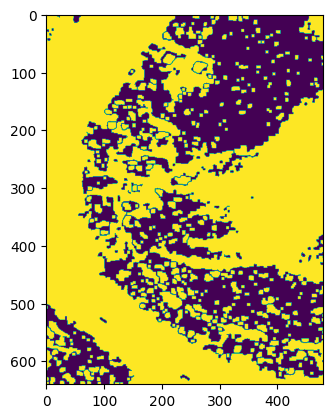

In [6]:
import matplotlib.pyplot as plt


print(groundMapModel)
plt.imshow(groundMapModel)
plt.plot()

